In [5]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from datetime import datetime
import numpy as np


plt.style.use('seaborn-v0_8-whitegrid')

In [2]:
import os
root_folder = os.path.dirname(os.path.abspath(os.getcwd()))
file_path = root_folder + "\\data\\meteorological\\meteorological.csv"

In [3]:
df = pd.read_csv(file_path)
df.head(5)

,time,ID,pm25,lat,lon,SQRT_SEA_DEM_LAT,WSPD,WDIR,TMP,TX,TN,TP,RH,PRES2M
0,2020-01-01,19,116.949130,21.049750,105.741870,5.922647,1.136119,145.942749,20.811243,23.219995,18.939997,0.3750,74.750000,102197.203125
1,2020-01-01,79,105.103043,21.015250,105.800130,4.307231,1.136119,145.942749,20.811243,23.219995,18.939997,0.3750,74.750000,102197.203125
2,2020-01-01,163,118.285100,21.024347,106.017288,4.988467,0.651509,145.395233,20.677492,23.029993,18.879999,0.1250,73.687500,102228.796875
3,2020-01-01,300,116.739130,21.023532,105.853941,4.865087,1.136119,145.942749,20.811243,23.219995,18.939997,0.3750,74.750000,102197.203125
4,2020-01-02,19,76.856667,21.049750,105.741870,5.922647,2.744283,147.084442,22.176249,25.119989,20.299982,0.1875,78.012497,102025.328125


In [4]:
df['time'] = pd.to_datetime(df['time'])

df = df.sort_values(by=['time', 'ID'], ascending=True)

df

,time,ID,pm25,lat,lon,SQRT_SEA_DEM_LAT,WSPD,WDIR,TMP,TX,TN,TP,RH,PRES2M
0,2020-01-01,19,116.949130,21.049750,105.741870,5.922647,1.136119,145.942749,20.811243,23.219995,18.939997,0.3750,74.750000,102197.203125
1,2020-01-01,79,105.103043,21.015250,105.800130,4.307231,1.136119,145.942749,20.811243,23.219995,18.939997,0.3750,74.750000,102197.203125
2,2020-01-01,163,118.285100,21.024347,106.017288,4.988467,0.651509,145.395233,20.677492,23.029993,18.879999,0.1250,73.687500,102228.796875
3,2020-01-01,300,116.739130,21.023532,105.853941,4.865087,1.136119,145.942749,20.811243,23.219995,18.939997,0.3750,74.750000,102197.203125
4,2020-01-02,19,76.856667,21.049750,105.741870,5.922647,2.744283,147.084442,22.176249,25.119989,20.299982,0.1875,78.012497,102025.328125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11503,2021-12-31,163,16.154054,21.024347,106.017288,4.988467,1.669253,22.916901,16.846243,18.989985,14.730005,0.0625,65.837502,102317.015625
11504,2021-12-31,172,17.153631,20.927000,106.314000,4.784339,1.322285,353.486359,17.187494,18.839991,15.249994,0.0000,63.812500,102335.617188
11505,2021-12-31,173,11.901323,20.977400,106.430800,4.589203,0.235641,347.438232,17.732492,19.739985,15.609980,0.0000,65.050003,102115.812500
11506,2021-12-31,195,24.209832,21.338470,105.367300,5.228505,1.295622,97.865257,16.122246,17.824003,14.982986,0.0000,70.632500,101743.898438


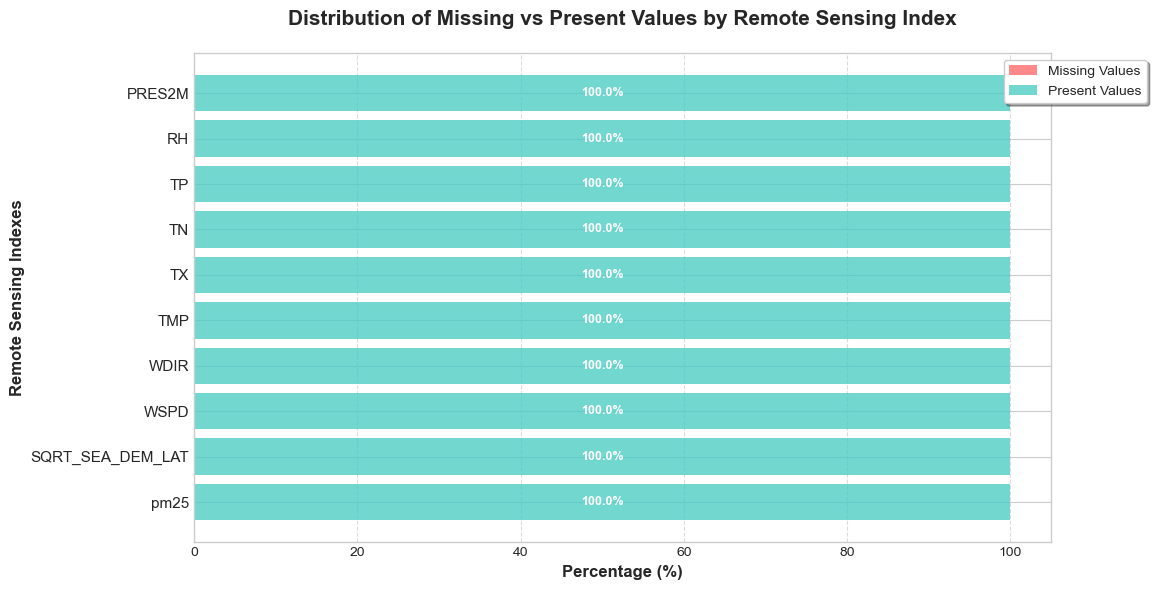

In [8]:
# Chuẩn bị dữ liệu
tmp_df = df.drop(['lon', 'lat', 'time', 'ID'], axis=1)
total_rows = len(tmp_df)
missing_counts = tmp_df.isna().sum()
missing_percent = (missing_counts / total_rows * 100).round(2)
non_missing_percent = 100 - missing_percent

# Tạo figure với kích thước lớn hơn
plt.figure(figsize=(12, 6))

# Sắp xếp các chỉ số theo phần trăm giá trị missing
sorted_indices = missing_percent.sort_values(ascending=True).index
y_pos = np.arange(len(sorted_indices))

# Vẽ các thanh ngang
plt.barh(y_pos, missing_percent[sorted_indices], color='#FF6B6B', alpha=0.8, 
         label='Missing Values')
plt.barh(y_pos, non_missing_percent[sorted_indices], left=missing_percent[sorted_indices], 
         color='#4ECDC4', alpha=0.8, label='Present Values')

# Định dạng trục y và labels
plt.yticks(y_pos, sorted_indices, fontsize=11)
plt.xticks(fontsize=10)
plt.xlabel('Percentage (%)', fontsize=12, fontweight='bold')
plt.ylabel('Remote Sensing Indexes', fontsize=12, fontweight='bold')

# Tiêu đề với khoảng cách và định dạng
plt.title('Distribution of Missing vs Present Values by Remote Sensing Index', 
          fontsize=15, fontweight='bold', pad=20)

# Đặt legend phía trên bên phải, bên ngoài biểu đồ
plt.legend(loc='upper right', bbox_to_anchor=(1.12, 1.0), 
           frameon=True, fancybox=True, shadow=True, fontsize=10)

# Thêm grid để dễ đọc
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Thêm nhãn phần trăm với màu sắc tương phản
for i, pos in enumerate(y_pos):
    # Nhãn cho phần missing
    if missing_percent[sorted_indices[i]] > 5:  # Chỉ hiển thị nhãn nếu thanh đủ rộng
        plt.text(missing_percent[sorted_indices[i]]/2, pos, 
                f'{missing_percent[sorted_indices[i]]:.1f}%', 
                ha='center', va='center', color='white', fontweight='bold', fontsize=9)
    
    # Nhãn cho phần present
    if non_missing_percent[sorted_indices[i]] > 5:  # Chỉ hiển thị nhãn nếu thanh đủ rộng
        plt.text(missing_percent[sorted_indices[i]] + non_missing_percent[sorted_indices[i]]/2, pos,
                f'{non_missing_percent[sorted_indices[i]]:.1f}%', 
                ha='center', va='center', color='white', fontweight='bold', fontsize=9)

# Điều chỉnh layout để chừa không gian cho legend
plt.tight_layout()
plt.subplots_adjust(right=0.88)  # Để có không gian cho legend

plt.show()

c:\Application\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Application\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\CA_UOP_MUOI\AppData\Local\Temp\ipykernel_2932\3037462555.py:22: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_normalized[col], label=col, color=color_palette[i], linewidth=2.5, alpha=0.7)
c:\Application\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN b

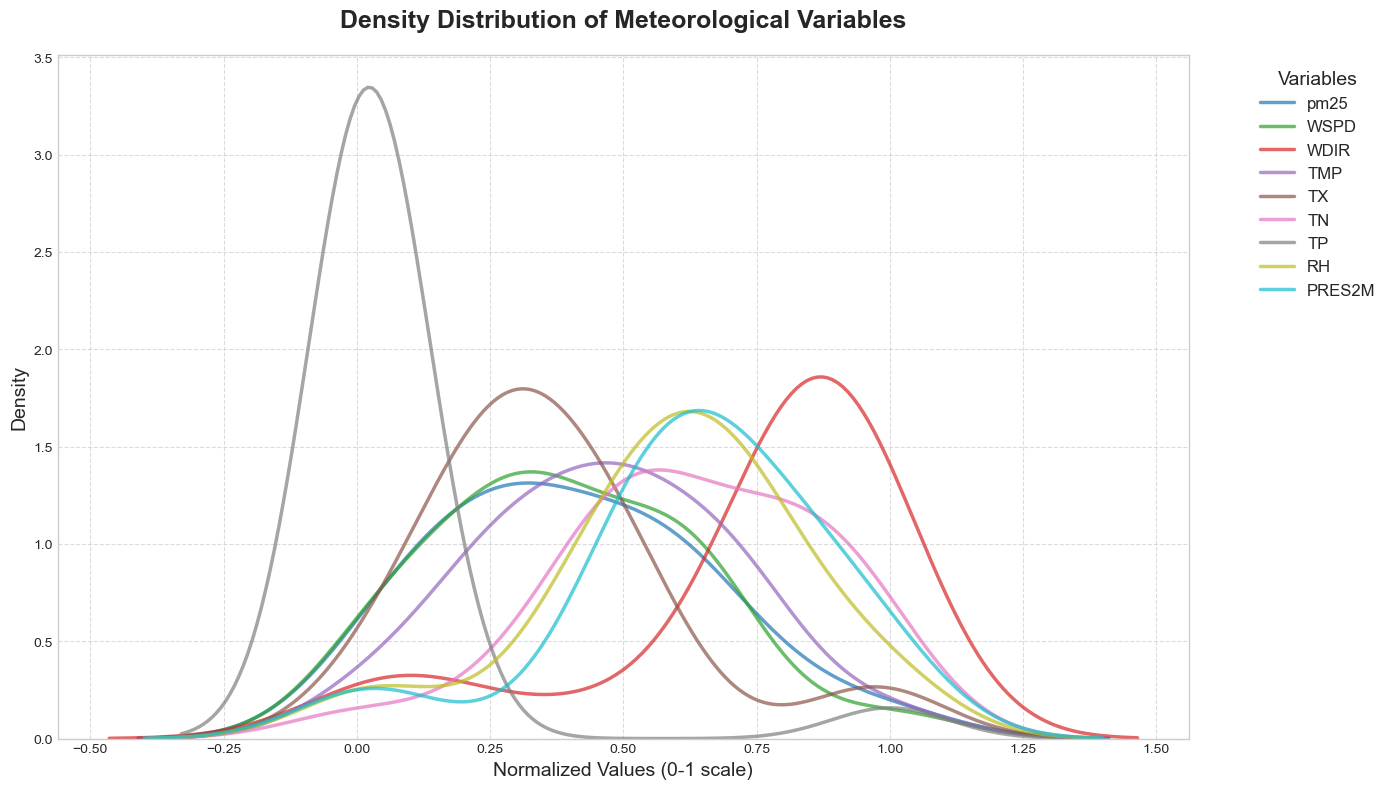

In [ ]:
from sklearn.preprocessing import MinMaxScaler

df_stats = df.drop(['lon', 'lat', 'time', 'ID'], axis=1).loc[df['ID'] == 5]

# Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(
    scaler.fit_transform(df_stats), 
    columns=df_stats.columns
)

# Thiết lập style và kích thước
plt.figure(figsize=(14, 8))
plt.style.use('seaborn-v0_8-whitegrid')

# Tạo bảng màu đẹp hơn
color_palette = sns.color_palette("tab10", n_colors=len(df_stats.columns))

# Vẽ density plot cho từng biến trong một đồ thị tổng
for i, col in enumerate(df_normalized.columns):
    sns.kdeplot(df_normalized[col], label=col, color=color_palette[i], linewidth=2.5, alpha=0.7)

# Thiết lập tiêu đề và nhãn trục
plt.title('Density Distribution of Meteorological Variables', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Normalized Values (0-1 scale)', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Cải thiện legend
plt.legend(title='Variables', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

# Thêm grid để dễ đọc
plt.grid(True, linestyle='--', alpha=0.7)

# Thêm khung viền và điều chỉnh bố cục
plt.tight_layout()
plt.show()